**Question 1**

Task 2   
Plotting LDA projection vector

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

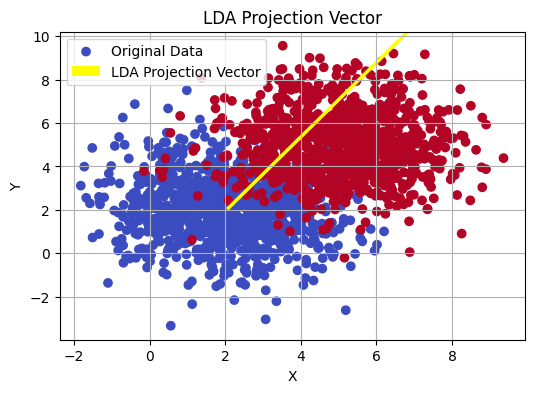

In [72]:
# Load data
data = pd.read_csv('data.csv', names=['x', 'y', 'label'])
X = data[['x', 'y']]
y = data['label']

# LDA
lda = LDA()
lda.fit(X, y)

lda_projection_vector = lda.coef_[0]

# Plot
plt.figure(figsize=(6, 4))

plt.scatter(X['x'], X['y'], c=y, cmap='coolwarm', label='Original Data')

plt.quiver(lda.means_[0, 0], lda.means_[0, 1], lda_projection_vector[0], lda_projection_vector[1],
           color='yellow', scale=3, label='LDA Projection Vector')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('LDA Projection Vector')
plt.legend()
plt.grid(True)
plt.show()

Task 3    
Accuracy Calculation

In [73]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Original Data: 1-NN classifier
knn_original = KNeighborsClassifier(n_neighbors=1)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# LDA Projection
lda = LDA()
X_train_projected = lda.fit_transform(X_train, y_train)
X_test_projected = lda.transform(X_test)

# Projected Data: 1-NN classifier
knn_projected = KNeighborsClassifier(n_neighbors=1)
knn_projected.fit(X_train_projected, y_train)
y_pred_projected = knn_projected.predict(X_test_projected)
accuracy_projected = accuracy_score(y_test, y_pred_projected)

print("Accuracy on Original Data:", accuracy_original)
print("Accuracy on Projected Data:", accuracy_projected)

Accuracy on Original Data: 0.89
Accuracy on Projected Data: 0.8716666666666667


**QUESTION 2**

In [74]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Task 0
Splitting the dataset

In [75]:
file_path = "/content/naive_bayes.csv"
df = pd.read_csv(file_path)

X = df.drop('Play', axis=1)
y = df['Play']

df

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Outlook').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Temp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Humidity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Windy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Temp'].value_counts()
    for x_label, grp in df.groupby('Outlook')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Outlook')
_ = plt.ylabel('Temp')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Humidity'].value_counts()
    for x_label, grp in df.groupby('Temp')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Temp')
_ = plt.ylabel('Humidity')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Windy'].value_counts()
    for x_label, grp in df.groupby('Humidity')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Humidity')
_ = plt.ylabel('Windy')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Play'].value_counts()
    for x_label, grp in df.groupby('Windy')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Windy')
_ = plt.ylabel('Play')

In [38]:
X_encoded = pd.get_dummies(X)
print(X_encoded)

    Outlook_Overcast  Outlook_Rainy  Outlook_Sunny  Temp_Cool  Temp_Hot  \
0                  0              1              0          0         1   
1                  0              1              0          0         1   
2                  1              0              0          0         1   
3                  0              0              1          0         0   
4                  0              0              1          1         0   
5                  0              0              1          1         0   
6                  1              0              0          1         0   
7                  0              1              0          0         0   
8                  0              1              0          1         0   
9                  0              0              1          0         0   
10                 0              1              0          0         0   
11                 1              0              0          0         0   
12                 1     

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=12/14, test_size=2/14, random_state=42)

# Print the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12, 10)
Shape of y_train: (12,)
Shape of X_test: (2, 10)
Shape of y_test: (2,)


Task 1   
Calculating Prior Probabilities

In [77]:
# Calculate Prior Probabilities
total_samples = len(y_train)
play_yes_count = y_train.value_counts()['yes']
play_no_count = y_train.value_counts()['no']

# Calculate probabilities
p_play_yes = play_yes_count / total_samples
p_play_no = play_no_count / total_samples

print("Prior Probability of playing :", p_play_yes)
print("Prior Probability of not playing:", p_play_no)

Prior Probability of playing : 0.5833333333333334
Prior Probability of not playing: 0.4166666666666667


Task 2 and Task 5  
Calculating Likelihood Probabilities Also using laplace smoothning

In [78]:
# Define pseudocount for Laplace smoothing
pseudocount = 1

# Calculate Likelihood Probabilities with Laplace smoothing
likelihood_probabilities_smoothed = {}

train_data = pd.concat([X_train, y_train], axis=1)

for feature in X_train.columns:# Iterate over each feature
    for value in X_train[feature].unique(): # For each unique feature value
        for class_value in y_train.unique(): # For each class
            count = len(train_data[(train_data[feature] == value) & (train_data['Play'] == class_value)]) + pseudocount

            # Calculate likelihood probability with Laplace smoothing
            likelihood_probability = count / (len(train_data[train_data['Play'] == class_value]) + pseudocount * len(X_train[feature].unique()))

            if (feature, value, class_value) not in likelihood_probabilities_smoothed:
                likelihood_probabilities_smoothed[(feature, value, class_value)] = likelihood_probability

# Calculate Prior Probabilities with Laplace smoothing
p_play_yes_smoothed = (play_yes_count + pseudocount) / (total_samples + pseudocount * len(y_train.unique()))
p_play_no_smoothed = (play_no_count + pseudocount) / (total_samples + pseudocount * len(y_train.unique()))


print("Likelihood Probabilities with Laplace smoothing:")
for key, value in likelihood_probabilities_smoothed.items():
    feature, feature_value, class_value = key
    print(f"P({feature}={feature_value}|Play={class_value}) = {value}")

print("\nPrior Probability of playing (P(Play=yes)) with Laplace smoothing:", p_play_yes_smoothed)
print("Prior Probability of not playing (P(Play=no)) with Laplace smoothing:", p_play_no_smoothed)


Likelihood Probabilities with Laplace smoothing:
P(Outlook_Overcast=0|Play=no) = 0.8571428571428571
P(Outlook_Overcast=0|Play=yes) = 0.5555555555555556
P(Outlook_Overcast=1|Play=no) = 0.14285714285714285
P(Outlook_Overcast=1|Play=yes) = 0.4444444444444444
P(Outlook_Rainy=1|Play=no) = 0.5714285714285714
P(Outlook_Rainy=1|Play=yes) = 0.3333333333333333
P(Outlook_Rainy=0|Play=no) = 0.42857142857142855
P(Outlook_Rainy=0|Play=yes) = 0.6666666666666666
P(Outlook_Sunny=0|Play=no) = 0.5714285714285714
P(Outlook_Sunny=0|Play=yes) = 0.6666666666666666
P(Outlook_Sunny=1|Play=no) = 0.42857142857142855
P(Outlook_Sunny=1|Play=yes) = 0.3333333333333333
P(Temp_Cool=0|Play=no) = 0.7142857142857143
P(Temp_Cool=0|Play=yes) = 0.5555555555555556
P(Temp_Cool=1|Play=no) = 0.2857142857142857
P(Temp_Cool=1|Play=yes) = 0.4444444444444444
P(Temp_Hot=1|Play=no) = 0.42857142857142855
P(Temp_Hot=1|Play=yes) = 0.3333333333333333
P(Temp_Hot=0|Play=no) = 0.5714285714285714
P(Temp_Hot=0|Play=yes) = 0.6666666666666666
P

Task 3    
Calculating Posterior Probabilities

In [79]:
posterior_probabilities_yes = {}
posterior_probabilities_no = {}

# Calculate posterior probabilities for each class
for i, row in X_test.iterrows():
    posterior_yes = p_play_yes
    posterior_no = p_play_no

    for feature, value in row.items():
        # Multiply by the likelihood probability of feature given class
        posterior_yes *= likelihood_probabilities_smoothed.get((feature, value, 'yes'), 0)
        posterior_no *= likelihood_probabilities_smoothed.get((feature, value, 'no'), 0)

    # Store the posterior probabilities for the current sample
    posterior_probabilities_yes[i] = posterior_yes
    posterior_probabilities_no[i] = posterior_no

# Normalize the probabilities
total_prob_yes = sum(posterior_probabilities_yes.values())
total_prob_no = sum(posterior_probabilities_no.values())

posterior_probabilities_yes = {k: v / total_prob_yes for k, v in posterior_probabilities_yes.items()}
posterior_probabilities_no = {k: v / total_prob_no for k, v in posterior_probabilities_no.items()}

print("Posterior probabilities for Play = yes:")
for k, v in posterior_probabilities_yes.items():
    print(f"Sample {k}: {v}")

print("\nPosterior probabilities for Play = no:")
for k, v in posterior_probabilities_no.items():
    print(f"Sample {k}: {v}")


Posterior probabilities for Play = yes:
Sample 9: 0.9090909090909091
Sample 11: 0.09090909090909088

Posterior probabilities for Play = no:
Sample 9: 0.28825622775800713
Sample 11: 0.7117437722419929


Task 4   
Making Predictions for test data

In [80]:
predictions = []

# Iterate over each sample in the test split
for i, row in X_test.iterrows():
    # Compare posterior probabilities for both classes
    if posterior_probabilities_yes[i] > posterior_probabilities_no[i]:
        predictions.append('yes')
    else:
        predictions.append('no')

# Print predictions
print("Predictions for test split examples:")
for i, prediction in enumerate(predictions):
    print(f"Sample {i}: {prediction}")


Predictions for test split examples:
Sample 0: yes
Sample 1: no
